In [31]:
from datetime import date, timedelta
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [6]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [7]:
sbux = returns(sbux)

In [8]:
sbux.head()

,id,symbol,high,low,open,close,volume,u_high,u_low,u_close,...,date,change,change_percent,change_over_time,market_change_over_time,resolution,timestamp,prev_close,return,log_return
0,1,SBUX,87.07,83.340,83.75,87.07,7291930,86.52,85.510,83.99,...,2020-09-21,0.000000,0.0000,0.000000,0.000000,daily,2021-09-20 16:37:19,NaN,NaN,NaN
1,2,SBUX,88.60,83.432,85.72,87.22,4585223,86.29,83.983,84.23,...,2020-09-22,0.061767,0.0007,0.000731,0.000732,daily,2021-09-20 16:37:19,87.07,0.001723,0.001721
2,3,SBUX,86.90,84.840,84.84,85.95,6489244,87.30,85.160,84.75,...,2020-09-23,-1.005530,-0.0115,-0.011038,-0.011042,daily,2021-09-20 16:37:19,87.22,-0.014561,-0.014668
3,4,SBUX,86.24,83.030,83.03,85.05,4931004,84.87,83.060,84.51,...,2020-09-24,0.050579,0.0006,-0.010325,-0.010578,daily,2021-09-20 16:37:19,85.95,-0.010471,-0.010526
4,5,SBUX,88.51,84.070,84.08,85.00,6075176,86.72,83.440,86.60,...,2020-09-25,1.297740,0.0158,0.005077,0.005055,daily,2021-09-20 16:37:19,85.05,-0.000588,-0.000588


In [10]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [11]:
params = t.fit(sbux['return'].astype(float).dropna())

In [13]:
df, loc, scale = params

In [14]:
y_list = t.pdf(x_list, df, loc, scale)

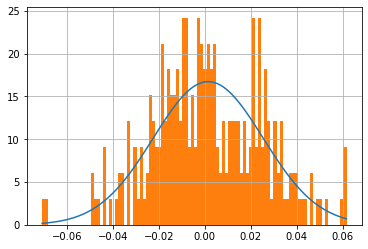

In [15]:
plt.plot(x_list, y_list);
sbux['return'].astype(float).hist(bins=100, density=True);

In [22]:
class myt:
    def __init__(self, deg_f):
        self.deg_f = deg_f
    
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.deg_f, loc, scale)

/mnt/c/Users/Tim/src/money-printer/src/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


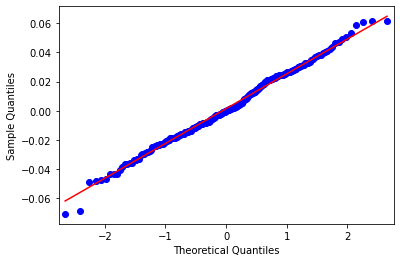

In [24]:
import statsmodels.api as sm
sm.qqplot(sbux['return'].astype(float).dropna(), dist=myt(df), line='s');

In [26]:
sbux['return'].skew()

0.026139581568459486

In [27]:
sbux['return'].kurtosis()

-0.022313014844406176

In [28]:
sbux['log_return'].skew()

-0.044848966643905405

In [29]:
sbux['log_return'].kurtosis()

0.016838191272249503

In [33]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

(-0.026614563279544548, -0.06251381959074642)